## Location data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import threading
from datetime import datetime
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv("location.csv")
mainDF = pd.read_csv("dataset.csv")

In [4]:
year_elections = mainDF.query("iyear != [1970, 1976, 1981, 1999, 2005, 2012, 2014, 2018]")

label = year_elections.iyear.value_counts().index
values = year_elections.iyear.value_counts().values

fig = px.bar(x=label, y=values, text_auto=True)

fig.update_layout(
    title='Total Number Of Attacks For Each Month From 1970 To 2022',
    xaxis_title='Month',
    yaxis_title='Number Of Attacks',
    legend_title='Months',
    xaxis_tickangle=45,
    height=550,
    showlegend=False,
)
label.sort_values()


Int64Index([1971, 1972, 1977, 1978, 1979, 1980, 1982, 1985, 1986, 1987, 1988,
            1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 2004, 2006,
            2008, 2009, 2010, 2011, 2013, 2015, 2016, 2017, 2019, 2020, 2021,
            2022],
           dtype='int64')

In [5]:
years = mainDF.query("iyear == [1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999]")
target_count = years.targtype1_txt.value_counts()
target_subtype_count = years.targsubtype1_txt.value_counts()
target_count

Police                            244
Business                           58
Private Citizens & Property        52
Transportation                     17
Tourists                           14
Government (General)               14
Religious Figures/Institutions      9
Terrorists/Non-State Militia        6
Maritime                            3
Journalists & Media                 2
Educational Institution             2
Other                               1
Airports & Aircraft                 1
Unknown                             1
Name: targtype1_txt, dtype: int64

In [6]:
years = mainDF.query("iyear == [2013, 2014, 2015, 2016, 2017]")
target_count = years.targtype1_txt.value_counts()
target_subtype_count = years.targsubtype1_txt.value_counts()
target_count

Police                            568
Military                          554
Unknown                           208
Private Citizens & Property       192
Business                           75
Government (General)               74
Utilities                          67
Religious Figures/Institutions     46
Transportation                     46
Educational Institution            32
Government (Diplomatic)            11
Journalists & Media                10
Telecommunication                   9
Other                               7
Food or Water Supply                6
Airports & Aircraft                 5
Tourists                            4
Terrorists/Non-State Militia        4
Violent Political Party             2
Maritime                            2
NGO                                 1
Name: targtype1_txt, dtype: int64

In [7]:
fig = px.histogram(mainDF.iyear, text_auto=True, color_discrete_sequence=['lightblue'])

fig.update_layout(
    title='Number Of Attacks For Each Year',
    xaxis_title_text='Years',
    yaxis_title_text='Number Of Attacks',
    showlegend=False, bargap=0.05,
    uniformtext_minsize=100,
)

In [8]:
year_count = mainDF.iyear.value_counts().sort_index()
bins = np.arange(1970, 2023, 4)

df_1 = pd.DataFrame(year_count.values, year_count.index)

df_1.iplot()

In [9]:
from scipy.stats import ttest_ind

election_years = [1970, 1976, 1981, 1999, 2005, 2012, 2014, 2018]

num_attacks_elections = np.array([1, 9, 1, 2, 49, 354, 54])
num_attacks_non_elections = np.array([1, 1, 1, 2, 1, 5, 1, 2, 4, 7, 9, 7, 13,
                                     10, 79, 143, 102, 51, 22, 3, 3, 5, 1, 2,
                                     2, 18, 321, 647, 376, 225, 63, 57, 11, 8,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

t_statistic, p_value = ttest_ind(num_attacks_elections, num_attacks_non_elections, equal_var=False)

print("Mean number of attacks in election years:", num_attacks_elections.mean())
print("Mean number of attacks in non-election years:", num_attacks_non_elections.mean())
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Mean number of attacks in election years: 67.14285714285714
Mean number of attacks in non-election years: 47.891304347826086
T-statistic: 0.3719996325560931
P-value: 0.719919072209564


In [10]:

lst = mainDF.imonth.value_counts().sort_index()
label = ['JAN', 'FEB', 'MAR', 'APR',
         'MAY', 'JUN', 'JUL', 'AUG',
         'SEP', 'OCT', 'NOV', 'DEC']
values = lst.values
fig = px.bar(x=label, y=values, color=label, text_auto=True)
fig.update_traces(
    textposition='outside'
)

#Update the layout of the figure
fig.update_layout(
    title='Total Number Of Attacks For Each Month From 1970 To 2022',
    xaxis_title='Month',
    yaxis_title='Number Of Attacks',
    legend_title='Months',
    xaxis_tickangle=45,
    height=550,
    showlegend=False,
)

In [12]:
from datetime import datetime
import numpy as np
import pandas as pd

date = []
for i in range(len(mainDF["iyear"])):
    date.append(str(mainDF["imonth"][i]) + "-" + str(mainDF["iyear"][i]))

date_array = np.array(date)

format_string = "%m-%Y"  # Updated format string to include only month and year

lst_date = []

for i in date_array:
    lst_date.append(datetime.strptime(i, format_string).date())  # Extract only the date component

date_array = np.array(lst_date)

date_ = pd.DataFrame(date_array)
date_count = date_.value_counts().sort_index()

df_2 = pd.DataFrame(date_count.values, date_count.index,)
df_2.iplot()

In [13]:
df_attacks = mainDF.attacktype1_txt.value_counts().drop(index='Unknown', axis=1)
label = ['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Facility/Infrastructure',
         'Hostage Taking', 'Hijacking', 'Hostage Taking', 'Unarmed Assault']

fig = px.bar(x=label, y=df_attacks.values, color=label, text_auto=True)
fig.update_traces(
    textposition='outside'
)

fig.update_layout(
    title='Number Of Attacks For each Attack Type',
    xaxis_title='Attack Type',
    yaxis_title='Number Of Attacks',
    legend_title='Attack Types',
    uniformtext_minsize=10,
    xaxis_tickangle=45,
    height=550,
    showlegend=False,
)

In [14]:
df_provstate = mainDF.governorate.value_counts()
df_provstate = df_provstate[:7]

label = ['North Sinai', 'Cairo', 'Minya', 'Asyut', 'Giza', 'Al Sharqia', 'Faiyum']
fig = px.bar(x=label, y=df_provstate, color=label, text_auto=True, template='plotly_dark')

fig.update_traces(
    textposition='outside'
)

fig.update_layout(
    title='Top 7 Governorates Attacked in Egypt',
    xaxis_title='Governorates',
    yaxis_title='Number Of Attacks',
    showlegend=False,
    xaxis_tickangle=0,
)


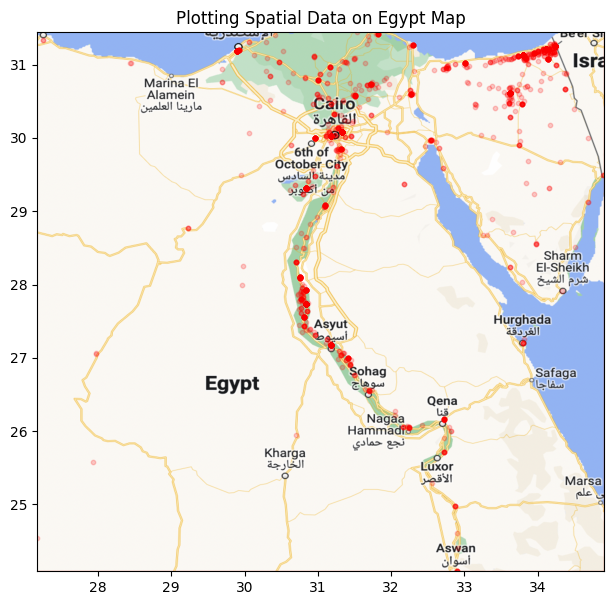

In [18]:
BBox = (df.longitude.min(),df.longitude.max(),df.latitude.min(), df.latitude.max())

ruh_m = plt.imread('./plots/map.png')

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Plotting Spatial Data on Egypt Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')


plt.show()